# Multi-label emotion classification in texts

According to the Oxford English Dictionary, emotion is defined as “A strong feeling deriving from one’s circumstances, mood, or relationships with others”.1 Hwang and Matsumoto (2016) define emotions as intrinsic constructs that are frequently invoked during socialization and help in interaction with others. Emotions are a fundamental part of human life, influencing our choices as well as our psychological and physical health. A piece of text can convey an emotion where author’s intention is to communicate a certain emotion. The goal of emotion classification is to find possible emotions in a text that best reflect the author’s mental state. Given their extensive presence and impact, the development of models for classifying emotions is essential. Emotion classification models have a broad range of applications in many fields, such as marketing, medical, education, etc.

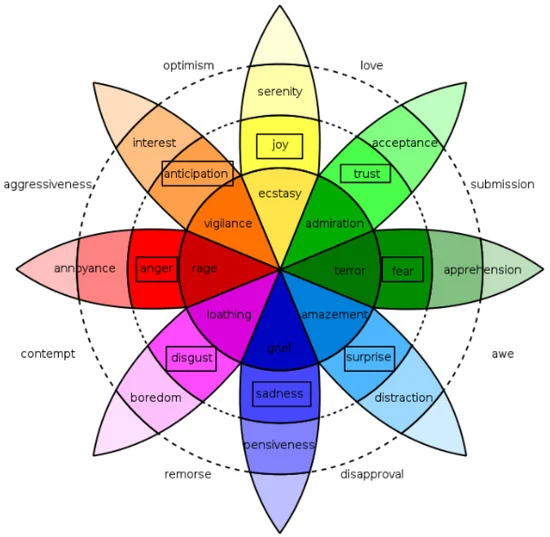


Multi-Label Emotion Recognition from Text refers to the process of identifying multiple emotions expressed within a single piece of text, meaning a given sentence or paragraph can be classified as containing several emotions like "happiness", "anger", and "sadness" simultaneously, rather than just one dominant emotion; essentially, it's a type of natural language processing task that uses machine learning to analyze text and assign multiple emotion labels to it based on the sentiment conveyed.
Key points about Multi-Label Emotion Recognition:
Multiple emotions per text:
Unlike single-label emotion recognition, multi-label allows for a text to be associated with more than one emotion at once.
Complex classification problem:
This task is considered more challenging than single-label emotion recognition due to the potential for overlapping emotions and the need to accurately identify all relevant emotions within a text.


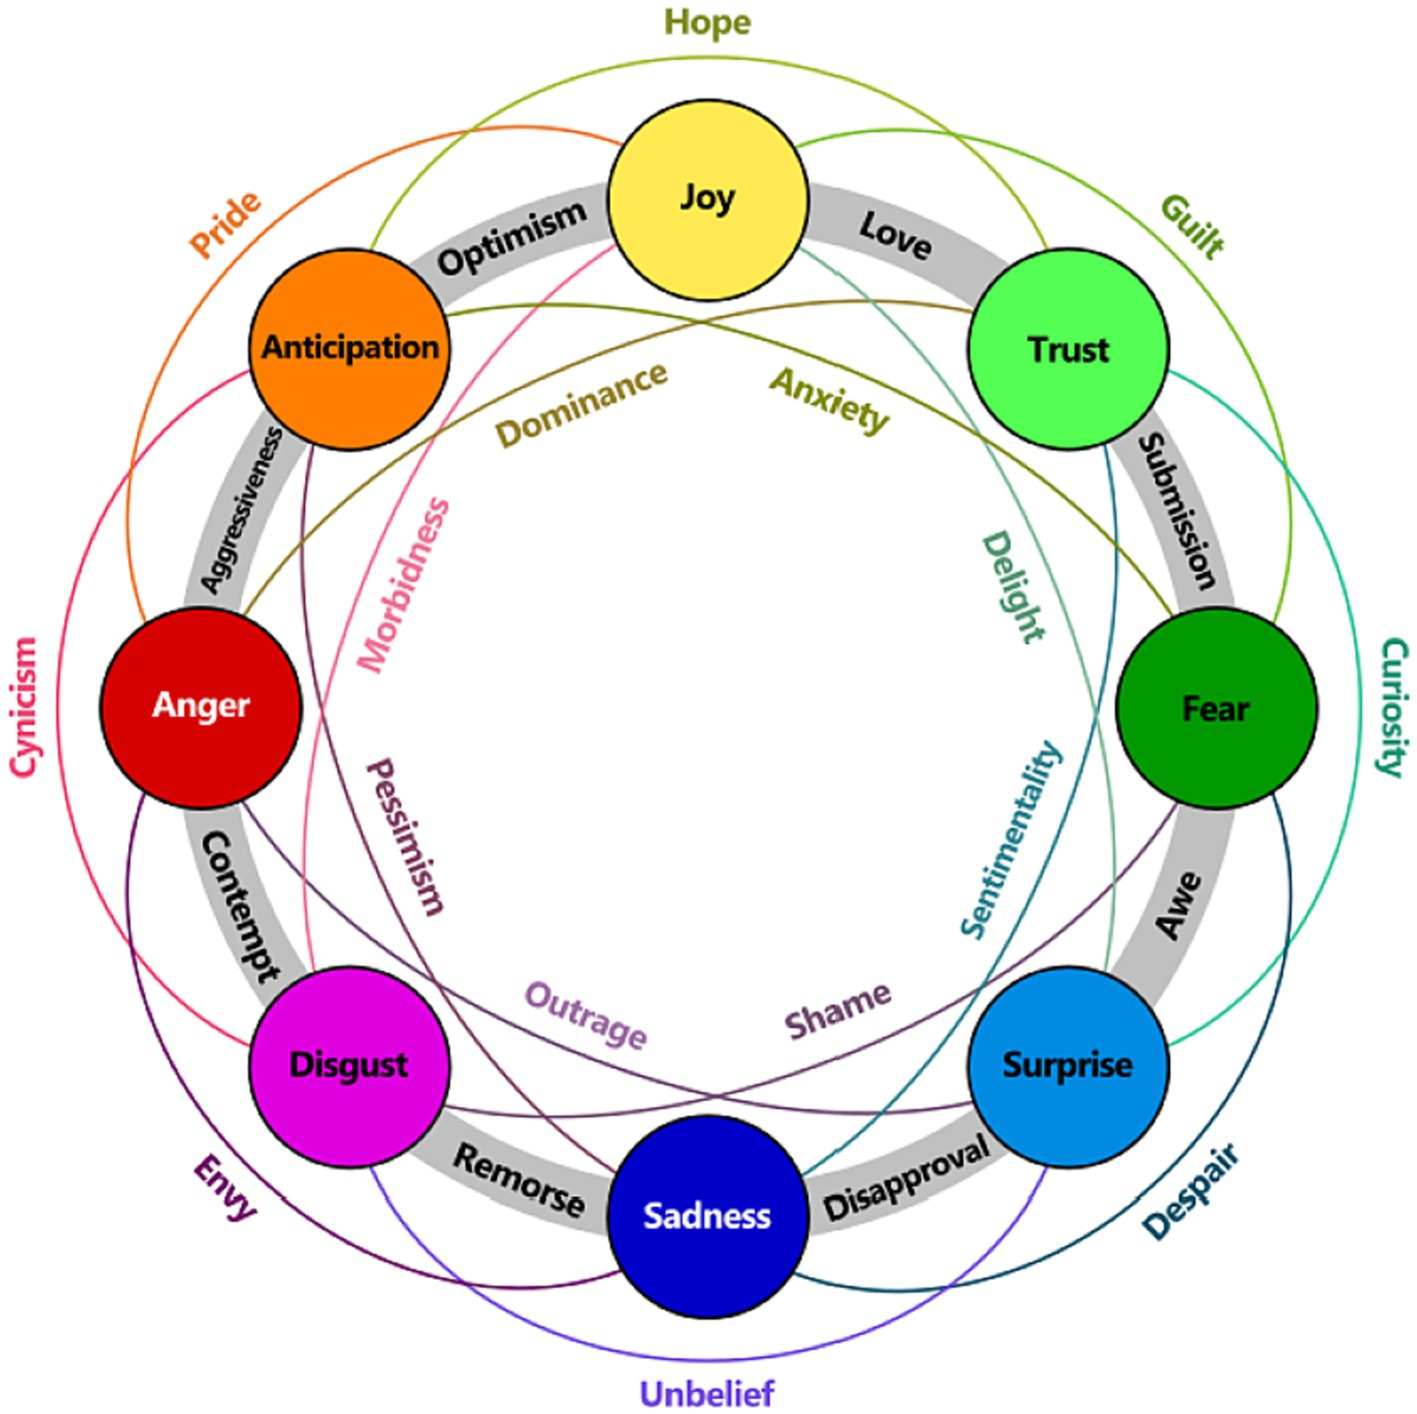

#  Download and Load the Dataset
The GoEmotions dataset by Google is available on Hugging Face Datasets. we can install and load it using:

In [ ]:
!pip install datasets
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("go_emotions")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

# Explore Data Structure

In [ ]:
from datasets import load_dataset

# Load the GoEmotions dataset
dataset = load_dataset("go_emotions")

# Check dataset structure
print(dataset)

# Show some sample data
print(dataset["train"][0])


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


# Preprocessing the Text Data
Before training our model, we need to clean the text. Preprocessing includes:
✅ Removing special characters and extra spaces
✅ Lowercasing the text
✅ Tokenizing (BERT requires tokenized text)

# Install Required Libraries
First, install transformers and datasets

In [ ]:
!pip install transformers datasets


# Load Dataset & Preprocess
Now, let's clean the text:

In [ ]:
import re
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("go_emotions")

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply cleaning to dataset
dataset = dataset.map(lambda x: {"text": clean_text(x["text"])})

# Print a sample
print(dataset["train"][0])


Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

{'text': 'my favourite food is anything i didnt have to cook myself', 'labels': [27], 'id': 'eebbqej'}


# Tokenization for BERT
BERT needs tokenized input. Let's use AutoTokenizer from transformers:

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset

# Load dataset (example)
dataset = load_dataset("go_emotions")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize function
def tokenize_data(example):
    return tokenizer(
        example["text"],
        padding="max_length",  # Ensures uniform length
        truncation=True,       # Truncates long texts
        max_length=128,        # Choose an optimal length
        return_tensors="np"    # Returns NumPy tensors (or "pt" for PyTorch)
    )

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_data, batched=True)

# Check a sample
print(tokenized_dataset["train"][0])


Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej', 'input_ids': [101, 2026, 8837, 2833, 2003, 2505, 1045, 2134, 1005, 1056, 2031, 2000, 5660, 2870, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 

# ⚖️ Handling Imbalanced Data
The GoEmotions dataset is imbalanced, meaning some emotions appear more than others. To fix this, we can:

✅ Oversample minority labels (duplicate underrepresented examples).

✅ Undersample majority labels (reduce overrepresented examples).

✅ Use class weights in model training.

# Check Class Distribution
First, let's see how imbalanced our data is

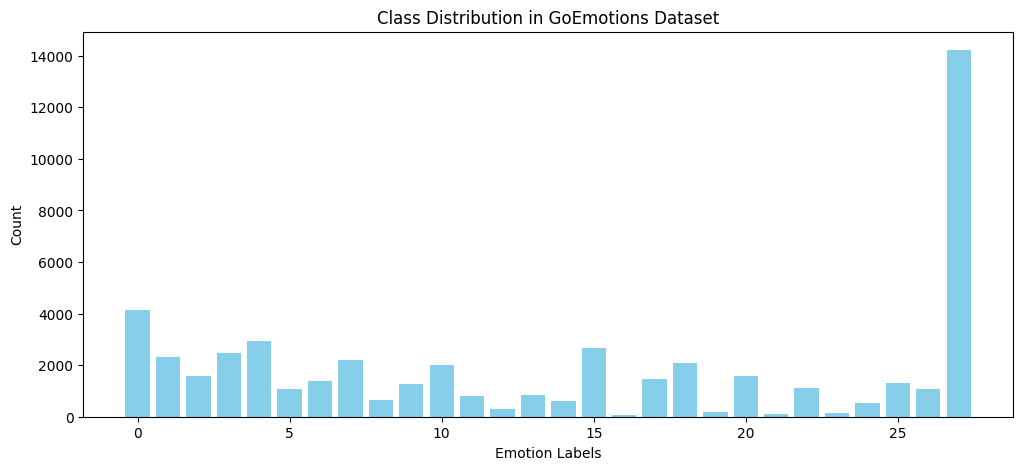

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each label
label_counts = Counter(label for labels in dataset["train"]["labels"] for label in labels)

# Sort by frequency
sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
labels, counts = zip(*sorted_labels)

# Plot
plt.figure(figsize=(12,5))
plt.bar(labels, counts, color='skyblue')
plt.xlabel("Emotion Labels")
plt.ylabel("Count")
plt.title("Class Distribution in GoEmotions Dataset")
plt.show()


#  Balance the Dataset

Oversampling
we can adjust class weights during training.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute weights
all_labels = [label for labels in dataset["train"]["labels"] for label in labels]
class_weights = compute_class_weight("balanced", classes=np.unique(all_labels), y=all_labels)

# Convert to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weights_dict)


Class Weights: {0: 0.44191456243514354, 1: 0.7839807314678449, 2: 1.1647141945482724, 3: 0.7389097744360902, 4: 0.6209959655859622, 5: 1.6790314101721646, 6: 1.334142648287385, 7: 0.8330018908521876, 8: 2.847281034098507, 9: 1.4382246988629968, 10: 0.9026246997315247, 11: 2.3015222482435598, 12: 6.023455917020273, 13: 2.1396332272651146, 14: 3.062260306807287, 15: 0.6856150048298809, 16: 23.70269016697588, 17: 1.2569608421881149, 18: 0.8749315162306533, 19: 11.128702090592334, 20: 1.1544004698653656, 21: 16.442406692406692, 22: 1.6442406692406693, 23: 11.928804855275443, 24: 3.3488204456094364, 25: 1.3764005602240896, 26: 1.721799191374663, 27: 0.12835692684838193}


# Implement Class Weights in Training
For PyTorch (Hugging Face Transformers)

In [ ]:
import torch

# Convert class weights to tensor
class_weights_tensor = torch.tensor([class_weights[i] for i in range(len(class_weights))], dtype=torch.float)

# Define loss function with class weights
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)


# Fine-tune a transformer model such as BERT for multi-label classification.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import f1_score, hamming_loss

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset Class
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

# Model Initialization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=28, problem_type="multi_label_classification")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss Function and Optimizer
class_weights = torch.tensor([0.44, 0.78, 1.16, 0.73, 0.62, 1.67, 1.33, 0.83, 2.84, 1.43, 0.90, 2.30, 6.02, 2.13, 3.06, 0.68, 23.70, 1.25, 0.87, 11.12, 1.15, 16.44, 1.64, 11.92, 3.34, 1.37, 1.72, 0.12]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Training Function
def train_model(model, train_loader, val_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        all_preds, all_labels = [], []
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            all_preds.append(torch.sigmoid(outputs).detach().cpu().numpy())
            all_labels.append(labels.cpu().numpy())
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")
        evaluate_model(model, val_loader)

# Evaluation Function
def evaluate_model(model, val_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask).logits
            all_preds.append(torch.sigmoid(outputs).cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    preds = (np.concatenate(all_preds) > 0.5).astype(int)
    labels = np.concatenate(all_labels)
    print(f"Hamming Loss: {hamming_loss(labels, preds):.4f}, F1 Score: {f1_score(labels, preds, average='micro'):.4f}")

# Training Execution
# Assuming train_loader and val_loader are already defined
# train_model(model, train_loader, val_loader)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Recreate Validation Data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming dataset["train"]["text"] and dataset["train"]["labels"] contain all data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    dataset["train"]["text"], dataset["train"]["labels"], test_size=0.2, random_state=42
)

# Now create DataLoader
val_dataset = EmotionDataset(val_texts, val_labels, tokenizer)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print(f"Validation Loader Size: {len(val_loader)}")


Validation Loader Size: 543


# Ensuring Consistent Label Shape
Modify the EmotionDataset class to ensure all labels have the correct shape. Update the __getitem__ method:

In [ ]:
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels  # Ensure labels are always the same length
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )

        # Ensure labels are a fixed-length tensor
        labels_tensor = torch.tensor(self.labels[idx], dtype=torch.float)

        # Debugging output
        print(f"Text: {self.texts[idx]}")
        print(f"Labels (before processing): {self.labels[idx]}")
        print(f"Labels Tensor Shape: {labels_tensor.shape}")

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': labels_tensor
        }


In [ ]:
import numpy as np

class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128, num_labels=28):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.num_labels = num_labels  # Ensure label length consistency

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )

        # Convert labels to a fixed-length binary vector (28 labels)
        labels_array = np.zeros(self.num_labels, dtype=np.float32)

        # Ensure labels are within bounds
        for label in self.labels[idx]:
            labels_array[int(label)] = 1  # Set the corresponding label index to 1

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(labels_array, dtype=torch.float)  # Fixed-size label tensor
        }


In [ ]:
val_dataset = EmotionDataset(val_texts, val_labels, tokenizer)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
for batch in val_loader:
    print("Batch Label Shape:", batch['labels'].shape)  # Should be (batch_size, 28)
    break


Batch Label Shape: torch.Size([32, 28])


# Evaluate the model using metrics like Hamming loss and F1 score.

In [ ]:
def evaluate_model(model, val_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask).logits
            preds = torch.sigmoid(outputs).cpu().numpy()
            labels = labels.cpu().numpy()

            all_preds.append(preds)
            all_labels.append(labels)

    # Convert lists to arrays
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Debugging prints
    print("Sample Predictions:", all_preds[:5])  # Print first 5 predictions
    print("Sample Labels:", all_labels[:5])      # Print first 5 labels

    # Threshold predictions at 0.5
    preds_bin = (all_preds > 0.5).astype(int)

    print("Sample Binary Predictions:", preds_bin[:5])

    # Compute and print metrics
    hamming = hamming_loss(all_labels, preds_bin)
    f1 = f1_score(all_labels, preds_bin, average='micro')

    print(f"Hamming Loss: {hamming:.4f}")
    print(f"F1 Score: {f1:.4f}")


In [ ]:
evaluate_model(model, val_loader)


Sample Predictions: [[0.4990349  0.4495227  0.6049143  0.42696306 0.63493323 0.631757
  0.4548257  0.55840963 0.4419829  0.5659109  0.40115166 0.48371807
  0.51550466 0.314372   0.6681299  0.49505243 0.38766447 0.585106
  0.6222407  0.6833692  0.6041027  0.4054355  0.6226272  0.5327094
  0.5476027  0.5069394  0.5261149  0.50133955]
 [0.4632787  0.4709428  0.5876101  0.42955506 0.63801396 0.6305948
  0.42171568 0.57693017 0.43422583 0.5606718  0.3923157  0.48123187
  0.4859211  0.32167524 0.6732315  0.5100507  0.37103084 0.5930633
  0.6217263  0.68504006 0.62049997 0.40868604 0.6102046  0.5070083
  0.53525823 0.49841598 0.5100729  0.5132425 ]
 [0.47066212 0.4904757  0.5934779  0.45897865 0.6631189  0.6193353
  0.39912438 0.5923437  0.4516608  0.5521521  0.40489948 0.50319713
  0.4935941  0.34490103 0.64065725 0.507364   0.3658111  0.6035382
  0.63602024 0.6259581  0.58610237 0.41880992 0.625198   0.4823166
  0.51421785 0.49322668 0.5819568  0.48320195]
 [0.4642296  0.42189392 0.58597314

Now, let's test the system on real-world textual data like customer feedback or social media posts.

# Define Sample Texts
We will test the model on a few real-world examples.

python
Copy
Edit


In [ ]:
test_texts = [
    "I love this product! It's amazing and makes my life so much easier.",
    "I'm so frustrated with this service. It never works properly!",
    "Feeling so happy and excited for the weekend!",
    "This is the worst experience I've ever had. I'm extremely disappointed.",
    "Thank you so much for your support! It really means a lot to me.",
]


#  Preprocess the Texts
We tokenize the input and convert it into tensors for the model

In [ ]:
def preprocess_texts(texts, tokenizer, max_len=128):
    encoding = tokenizer(
        texts,
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='pt'
    )
    return encoding['input_ids'], encoding['attention_mask']


# Predict Emotions
Now, we pass the texts through the trained model.

In [ ]:
def predict_emotions(model, tokenizer, texts, threshold=0.5):
    model.eval()
    input_ids, attention_mask = preprocess_texts(texts, tokenizer)

    with torch.no_grad():
        outputs = model(input_ids.to(device), attention_mask=attention_mask.to(device))

    # Apply sigmoid activation to get probabilities
    probabilities = torch.sigmoid(outputs.logits).cpu().numpy()

    # Convert probabilities to binary predictions (1 if above threshold, else 0)
    predictions = (probabilities > threshold).astype(int)

    return predictions, probabilities


# Run Predictions and Interpret Results
Now, let's get predictions for the sample texts.

In [ ]:
predictions, probabilities = predict_emotions(model, tokenizer, test_texts)

# Emotion labels (assuming we have a predefined list)
emotion_labels = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "joy", "love", "nervousness", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise", "neutral"
]

# Print results
for i, text in enumerate(test_texts):
    print(f"Text: {text}")
    print("Predicted Emotions:")
    for j, label in enumerate(emotion_labels):
        if predictions[i][j] == 1:
            print(f"- {label} (Score: {probabilities[i][j]:.2f})")
    print("\n" + "-"*50 + "\n")


Text: I love this product! It's amazing and makes my life so much easier.
Predicted Emotions:
- anger (Score: 0.61)
- approval (Score: 0.64)
- caring (Score: 0.61)
- curiosity (Score: 0.57)
- disappointment (Score: 0.55)
- embarrassment (Score: 0.50)
- fear (Score: 0.66)
- joy (Score: 0.56)
- love (Score: 0.63)
- nervousness (Score: 0.63)
- optimism (Score: 0.63)
- realization (Score: 0.59)
- relief (Score: 0.52)
- remorse (Score: 0.55)
- sadness (Score: 0.51)
- surprise (Score: 0.54)
- neutral (Score: 0.53)

--------------------------------------------------

Text: I'm so frustrated with this service. It never works properly!
Predicted Emotions:
- anger (Score: 0.60)
- approval (Score: 0.64)
- caring (Score: 0.63)
- curiosity (Score: 0.58)
- disappointment (Score: 0.56)
- embarrassment (Score: 0.52)
- fear (Score: 0.67)
- gratitude (Score: 0.50)
- joy (Score: 0.57)
- love (Score: 0.63)
- nervousness (Score: 0.66)
- optimism (Score: 0.62)
- realization (Score: 0.60)
- relief (Score: 0.